# Modelos de Clustering (agrupación) K-means

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.  
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.  
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características. 
4. Entrenar el modelo configurando los diferentes hiperparámetros. 
5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc. 
6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo 
7. Interpretar, analizar y documentar los resultados obtenidos.  

In [2]:
# Importamos las librerias necesarias
import pandas as pd  # type: ignore # Para el manejo de datos
import numpy as np   # type: ignore # Para operaciones matemáticas
import matplotlib.pyplot as plt  # type: ignore # Para visualización de datos
import seaborn as sns  # type: ignore # Para visualización de datos más avanzada
from sklearn.preprocessing import StandardScaler  # type: ignore # Para estandarizar los datos
from sklearn.cluster import KMeans, AgglomerativeClustering  # type: ignore # Para los algoritmos de clustering
from sklearn import metrics  # type: ignore # Para evaluar la calidad de los clusters
from scipy.cluster.hierarchy import dendrogram, linkage  # type: ignore # Para crear dendrogramas
from sklearn.metrics import silhouette_score  # type: ignore # Para calcular el índice de silueta
from scipy.cluster.hierarchy import cophenet  # type: ignore # Para calcular el coeficiente de cophenet
from scipy.spatial.distance import pdist  # type: ignore # Para calcular distancias entre pares de puntos
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score # type: ignore
import warnings  # Para suprimir advertencias

# Configuramos para ignorar las advertencias
warnings.filterwarnings("ignore")


## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.  

In [3]:
#Cargamos el dataset
datos = pd.read_csv('./Mall_Customers.csv')
# Mostrar las primeras 10 filas de los datos
datos.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
datos.shape


(200, 5)

In [5]:
# Obtener un resumen estadístico de los datos (count, mean, std,min, max, quartiles 1 2 3)
datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


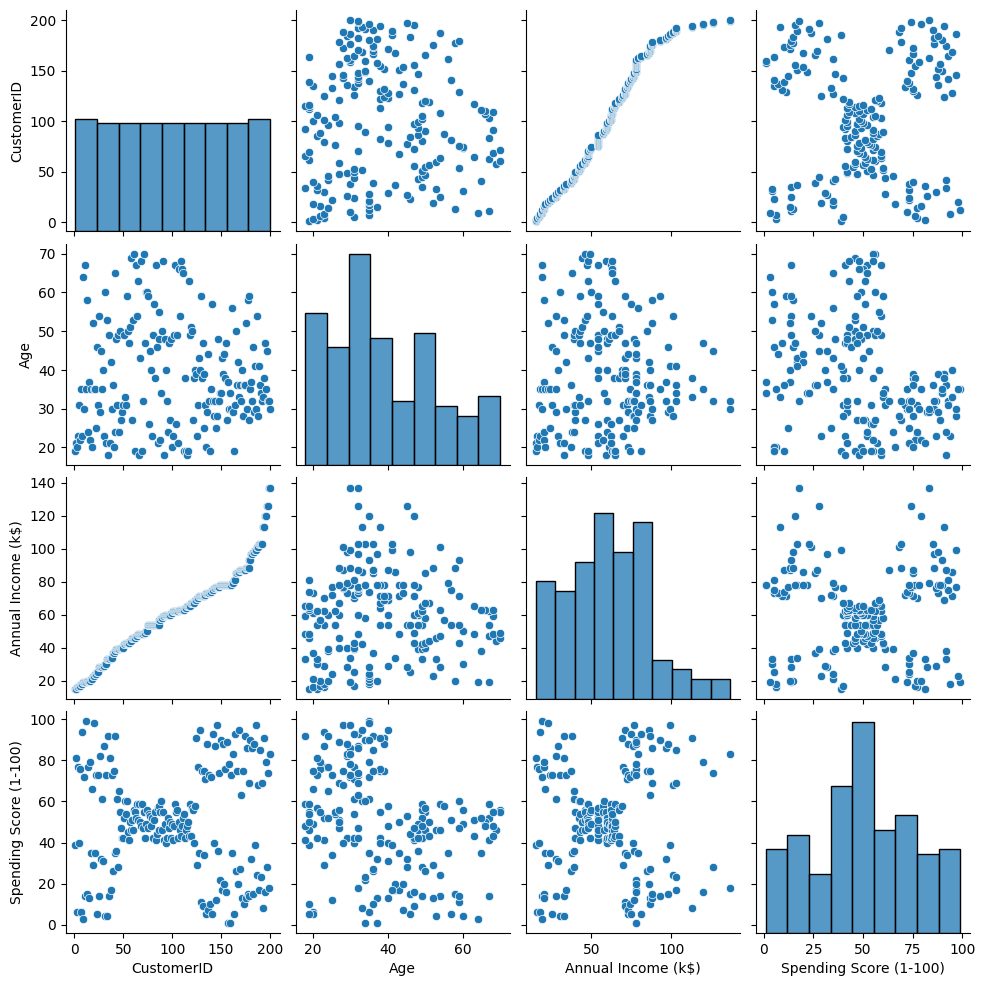

In [6]:
# Gráficos de dispersión para pares de variables
sns.pairplot(datos)
plt.show()

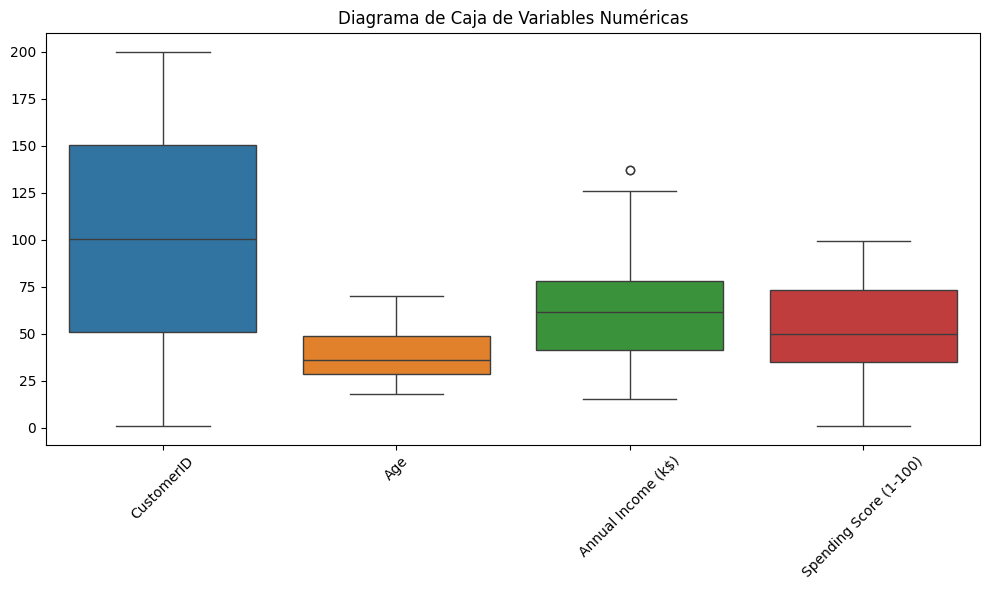

In [7]:
# Ajusta el tamaño de la figura
plt.figure(figsize=(10, 6))

# Diagramas de caja para variables numéricas
sns.boxplot(data=datos)
plt.title('Diagrama de Caja de Variables Numéricas')
plt.xticks(rotation=45) #rotar 45 grados los nombres del eje x
# Ajusta el espaciado entre los elementos en el eje y
plt.tight_layout()

plt.show()

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.  


In [8]:
# Verificar si hay valores faltantes
valores_faltantes = datos.isnull().sum()
print(valores_faltantes)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [9]:
# Crear un diccionario de mapeo en donde masculino es o y femenino es 1
mapeo_genero = {'Male': 0, 'Female': 1}

# Aplicar el mapeo a la columna de género
datos['Gender'] = datos['Gender'].map(mapeo_genero)

# Mostrar el DataFrame resultante
# Mostrar las primeras 10 filas de los datos
datos.head(10)

#

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
5,6,1,22,17,76
6,7,1,35,18,6
7,8,1,23,18,94
8,9,0,64,19,3
9,10,1,30,19,72


In [10]:
#conteo de datos atipicos

# Calcular el rango intercuartílico (IQR)
Q1 = datos.quantile(0.25)
Q3 = datos.quantile(0.75)
IQR = Q3 - Q1

# Identificar datos atípicos para cada columna
datos_atipicos = ((datos < (Q1 - 1.5 * IQR)) | (datos > (Q3 + 1.5 * IQR))).sum()

# Mostrar el conteo de datos atípicos por columna
print("Datos atípicos por columna:")
print(datos_atipicos)

Datos atípicos por columna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        2
Spending Score (1-100)    0
dtype: int64


In [11]:
# Calcular el rango intercuartílico (IQR)
Q1 = datos.quantile(0.25)  # Primer cuartil
Q3 = datos.quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1  # Rango intercuartílico

# Definir el umbral para identificar valores atípicos
umbral = 1.7

# Identificar datos atípicos para cada columna
datos_atipicos = ((datos < (Q1 - umbral * IQR)) | (datos > (Q3 + umbral * IQR)))
datos_atipicosmostrar = ((datos < (Q1 - umbral * IQR)) | (datos > (Q3 + umbral * IQR))).sum()

# Eliminar filas que contienen valores atípicos en al menos una columna
Datos_limpios = datos[~datos_atipicos.any(axis=1)]

# Mostrar la forma del DataFrame después de eliminar datos atípicos
print("Forma del DataFrame después de eliminar datos atípicos:", Datos_limpios.shape)

# Mostrar el número de valores atípicos que quedaron después de la eliminación
valores_atipicos_quedan = datos_atipicos.sum().sum()
print("Número de valores atípicos que quedan después de la eliminación:", valores_atipicos_quedan)

print("Datos atípicos por columna:")
print(datos_atipicosmostrar)

Forma del DataFrame después de eliminar datos atípicos: (200, 5)
Número de valores atípicos que quedan después de la eliminación: 0
Datos atípicos por columna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


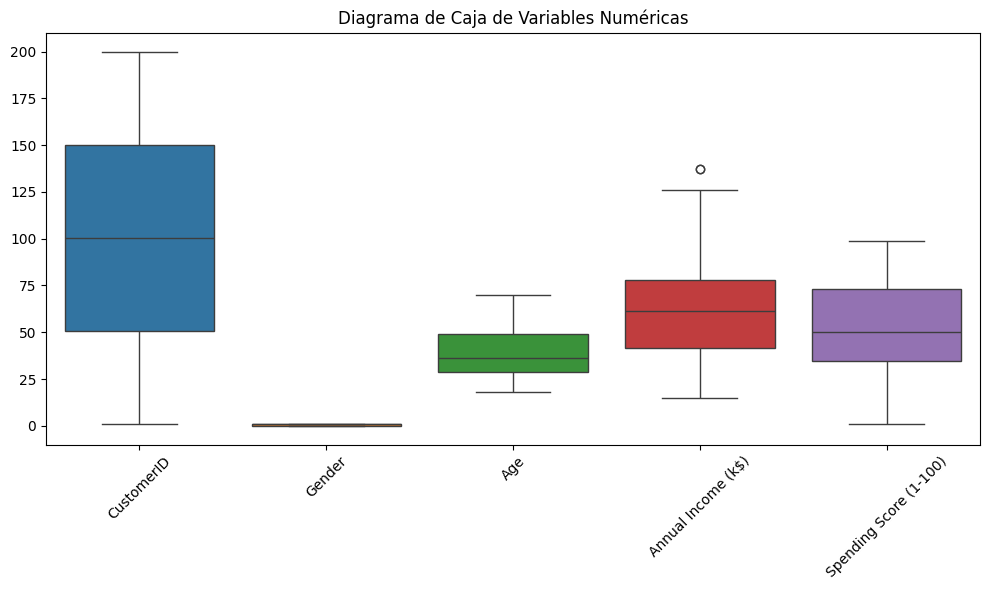

In [12]:
plt.figure(figsize=(10, 6))

# Diagramas de caja para variables numéricas
sns.boxplot(data=datos)
plt.title('Diagrama de Caja de Variables Numéricas')
plt.xticks(rotation=45) #rotar 45 grados los nombres del eje x
# Ajusta el espaciado entre los elementos en el eje y
plt.tight_layout()

plt.show()

## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características. 


In [13]:
# Filtrar columnas del modelo y verificamos
datos = datos[["Age","Annual Income (k$)","Spending Score (1-100)"]]
print(datos)


     Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]


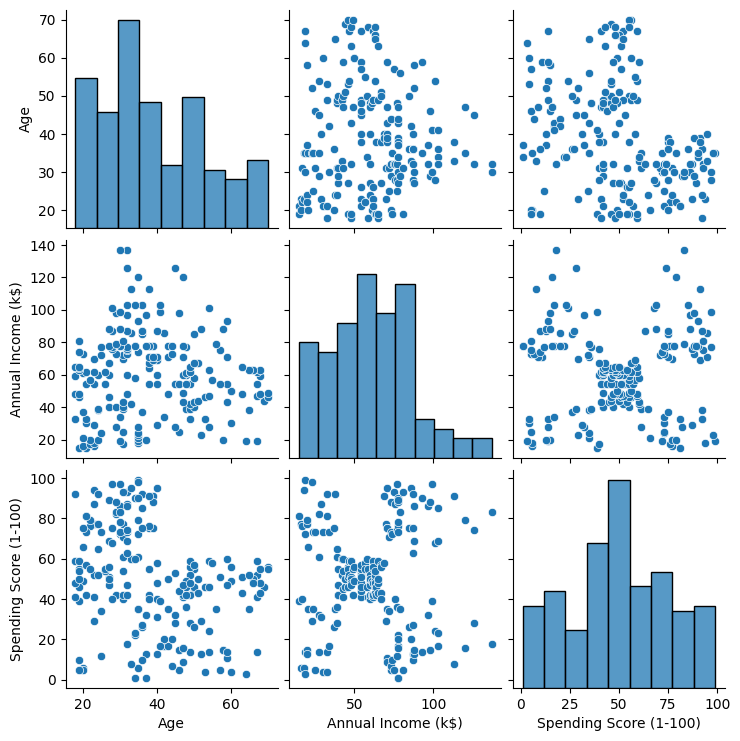

In [14]:
# Gráficos de dispersión para pares de variables
sns.pairplot(datos)
plt.show()

## 4. Entrenar el modelo configurando los diferentes hiperparámetros. 


  File "c:\Users\GMIPC\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\GMIPC\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\GMIPC\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\GMIPC\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


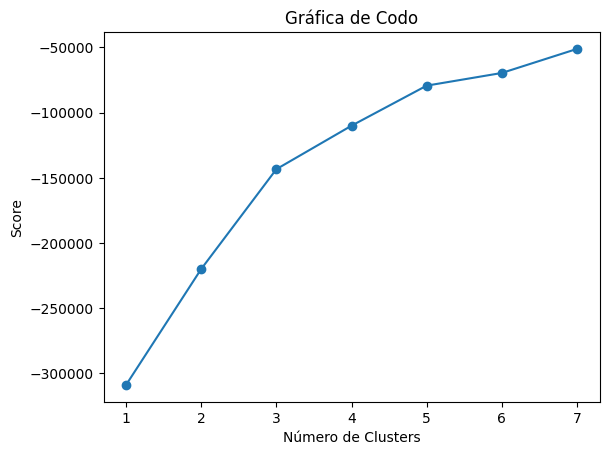

In [15]:
#Se realiza gráfica de codo para identificar valor de K

Nc = range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(datos).score(datos) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [16]:
# Generación del modelo de Agrupamiento del modelo con K=5 (Es decir haremos 5 grupos de agrupamiento)

Modelo = KMeans(n_clusters=5, random_state=0)
Modelo.fit(datos)


KMeans(n_clusters=5, random_state=0)

In [17]:
#Se agrega la columna Grupo a la BD para identificar el numero de grupo del agrupamiento

Modelo.labels_
datos["Grupo"] = Modelo.labels_
datos.head(50)

,Age,Annual Income (k$),Spending Score (1-100),Grupo
0,19,15,39,2
1,21,15,81,2
2,20,16,6,0
3,23,16,77,2
4,31,17,40,0
5,22,17,76,2
6,35,18,6,0
7,23,18,94,2
8,64,19,3,0
9,30,19,72,2


## 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc. 


In [18]:
# Importar las funciones necesarias

# Preparación de la métrica de la columna Grupo
Observaciones = len(datos)
X = datos.drop('Grupo', axis=1)
clusters = datos['Grupo']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]
# Imprime la tabla
from tabulate import tabulate # type: ignore
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))


+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Numero de Observaciones  |        200         |
|  Coeficiente Silhouette  | 0.3771108731967625 |
| Indice Calinski Harabasz | 133.49030043802063 |
|  Indice Davies Bouldin   | 0.9845471043038019 |
+--------------------------+--------------------+


## 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo 


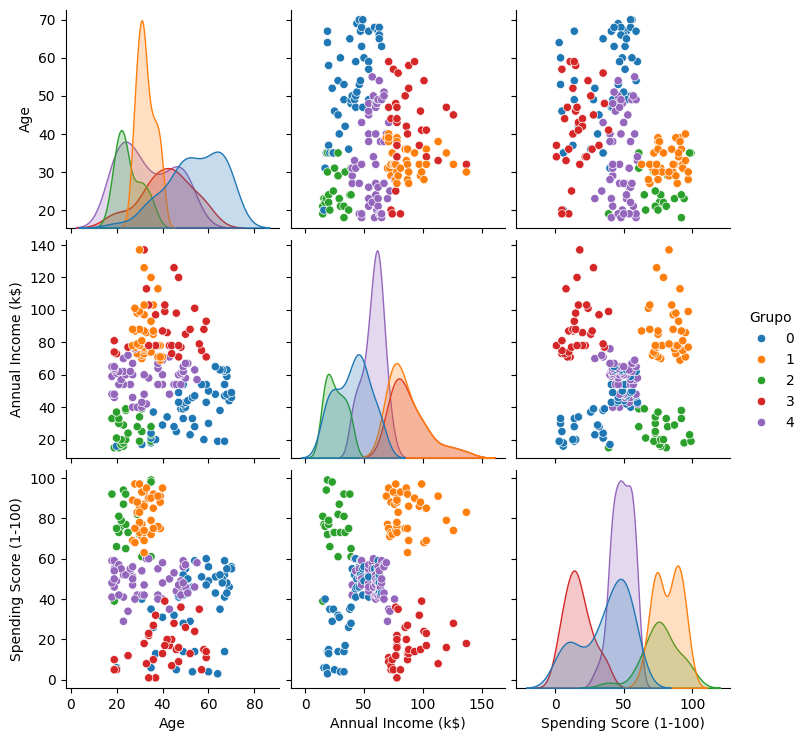

In [19]:
# Gráficos de dispersión para pares de variables
sns.pairplot(datos, hue='Grupo', palette='tab10')
plt.show()


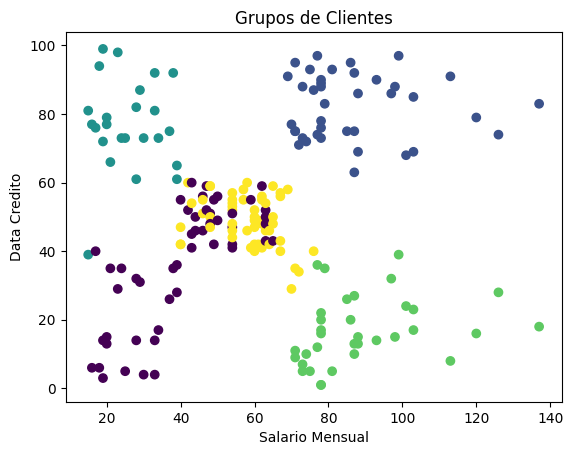

In [20]:
plt.scatter(datos['Annual Income (k$)'], datos['Spending Score (1-100)'], c=datos['Grupo'], cmap='viridis')
plt.xlabel('Salario Mensual')
plt.ylabel('Data Credito')
plt.title('Grupos de Clientes')
plt.show()

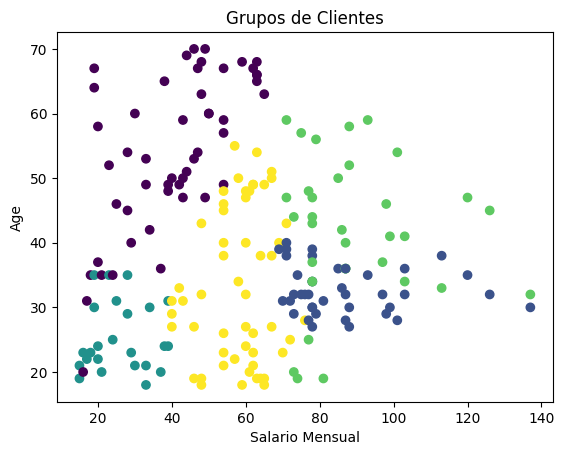

In [23]:
plt.scatter(datos['Annual Income (k$)'], datos['Age'], c=datos['Grupo'], cmap='viridis')
plt.xlabel('Salario Mensual')
plt.ylabel('Age')
plt.title('Grupos de Clientes')
plt.show()

In [22]:
# Crear un modelo 3D de los datos agrupados
import plotly.express as px # type: ignore

Grafica_3D = px.scatter_3d(datos, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='Grupo', symbol='Grupo', symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle'}, opacity=0.7, width=900, height=850, title=f'Modelo de K-Means con un k={5}', labels={'label': 'Cluster'}, color_discrete_map={})
Grafica_3D.update_layout(showlegend=False)

## 7. Interpretar, analizar y documentar los resultados obtenidos.  

Basándonos en la distribución de los puntos en el gráfico de edad vs entrante anual, podemos interpretar lo siguiente: 

* El grupo de color púrpura parece tener edades más altas (por encima de 60 aproximadamente) y salarios mensuales bajos a moderados.
* El grupo amarillo tiene edades promedio (entre 30 y 60 aproximadamente) y salarios mensuales en el rango medio-alto.
* El grupo verde muestra clientes de edades más jóvenes (por debajo de 40 aproximadamente) con salarios mensuales altos.
* Los grupos azul y turquesa tienen edades y salarios más dispersos, pero en general representan a clientes de edad media con ingresos medios a altos.

* Relación entre edad e ingresos: Se observa una tendencia positiva entre la edad y los ingresos. Esto implica que, en general, las personas de mayor edad tienden a tener ingresos anuales más altos. 

* Dispersión de los datos: Los datos muestran una dispersión moderada, lo que indica cierta variabilidad en la relación entre edad e ingresos. No todas las personas de la misma edad tienen los mismos ingresos.

* Se observan períodos de mayores ganancias entre las edades de 30 a 60 años. Después de los 60 años, se aprecia un declive en los ingresos recibidos. Hay una edad con un mayor número de ingresos, que se sitúa entre los 25 y 40 años. Esto demuestra que esta franja de edad es la más 
productiva en términos de generación de ingresos.

* Esta visualización de datos permite segmentar a los clientes en función de su edad y su nivel de ingresos, lo que puede ser valioso para diseñar estrategias de marketing, productos o servicios específicos para cada grupo objetivo.

El gráfico de dispersión muestra la relación entre el salario mensual y una métrica llamada "Dato Crédito" para diferentes grupos de clientes. 
Se pueden identificar varios grupos o clústeres de clientes:

* Grupo púrpura: Clientes con salarios bajos y datos crediticios bajos.
* Grupo amarillo: Clientes con salarios medios y datos crediticios medios.
* Grupo verde: Clientes con salarios relativamente altos y datos crediticios más altos.
* Grupo azul: Clientes con salarios muy altos y datos crediticios más dispersos.
* Grupo turquesa: Clientes con salarios extremadamente altos y datos crediticios muy altos.

Podemos hacer varias observaciones:
1.	Tendencia general: En general, se observa una tendencia positiva, lo que significa que a medida que aumenta el salario mensual, también tiende a aumentar el "Dato Crédito". Sin embargo, hay una dispersión considerable en los datos.
2.	Agrupaciones: Los puntos de datos parecen agruparse en diferentes clústeres o grupos, lo que sugiere la existencia de diferentes segmentos de clientes. Estos grupos se distinguen por colores diferentes en el gráfico.
3.	Grupo de ingresos bajos (púrpura): Este grupo tiene salarios mensuales bajos (generalmente por debajo de 40) y también bajos "Datos Crédito". Podría representar clientes con ingresos y capacidad crediticia limitados.
4.	Grupo de ingresos medios (amarillo): Este grupo tiene salarios mensuales y "Datos Crédito" en el rango medio, lo que podría indicar un segmento de clientes con capacidad financiera moderada.
5.	Grupo de ingresos altos (verde y azul): Estos grupos tienen salarios mensuales más altos y, en general, "Datos Crédito" más altos, lo que sugiere clientes con mayor capacidad financiera y crediticia.
6.	Grupo de ingresos muy altos (turquesa): Este pequeño grupo tiene los salarios mensuales más altos y también los "Datos Crédito" más altos, lo que podría representar a clientes con recursos financieros sustanciales.

 

Coeficiente de Silhouette: La puntuación de Silhouette es de aproximadamente tiene un valor de 0.377, lo cual indica una separación moderada entre los grupos. Si bien no es un valor cercano a 1, que sería lo ideal, sugiere que los grupos tienen cierta distinción, pero con algunas superposiciones entre ellos.

Índice de Calinski-Harabasz: La puntuación de Calinski Harabasz es de 133.49, un valor relativamente bajo. Esta métrica, cuando es alta, indica que los grupos están bien definidos. En este caso, el valor moderado sugiere que la definición de los grupos podría ser mejorada.

Indice Davies Bouldin: La puntuación de Davies Bouldin de 0.985, un valor cercano a 1. Idealmente, se busca un valor más bajo en esta métrica, ya que indicaría una menor similitud entre los grupos y, por lo tanto, una mejor separación. El valor obtenido sugiere que existe una similitud considerable entre los grupos identificados.